In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [28]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
283077,283077,403117,403118,What is the healthiest diet book?,What is the healthiest diet in the world?,0
277190,277190,396247,396248,Advantages and disadvantages of young people?,Review of ae dil hai mushkil?,0
294974,294974,307770,168151,What's your favorite subject in school?,What is your favorite school subject and why?,1
157713,157713,246529,246530,Should I flash an official rom from CyanogenMo...,CyanogenMod (product): Why is there no stable ...,0
201273,201273,191266,303238,Why do people write in cursive?,Why do people write?,0
224950,224950,333169,333170,What are your weight-loss meals?,What are the secrets to weight loss that even ...,0
320620,320620,293114,379856,What is difference between Group Discussion an...,What is the difference between a group discuss...,0
122091,122091,197699,22923,Why should/shouldn't I watch Death Note?,"What should I watch after ""Death Note""?",0
62127,62127,108347,108348,Is it mandatory for U.S. Army Rangers to atten...,Is it mandatory for U.S. Army Rangers to atten...,1
49610,49610,88276,88277,"What does ""a.o.b.f.p."" after a doctor's name m...","What does ""d.o."" after a doctor's name mean?",0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [12]:
#missing values
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [13]:
#duplicate row
df.duplicated().sum()

np.int64(0)

In [24]:
#Distribution of duplicated and non-dupicated questions

print(df['is_duplicate'].value_counts())
print('\n')
print(df['is_duplicate'].count())
print('\n')
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64


404290


is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


In [25]:
# More 0 and less 1. Hence the dataset is unbalanced

In [38]:
#Repeated Questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(qid)
print('\n')
print('Unique question IDs in the qid Series', np.unique(qid))
print('\n')
print('✅ Number of unique questions', np.unique(qid).shape[0])
print('\n')
print('\n')
print('\n')


print(qid.value_counts())
print('\n')

x = qid.value_counts()>1
print(x)
print('\n')

print('✅ Number of questions getting repeated', x[x].shape[0])


0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64


Unique question IDs in the qid Series [     1      2      3 ... 537931 537932 537933]


✅ Number of unique questions 537933






2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
41          1
43          1
47          1
537929      1
537931      1
Name: count, Length: 537933, dtype: int64


2559       True
30782      True
4044       True
2561       True
14376      True
          ...  
41        False
43        False
47        False
537929    False
537931    False
Name: count, Length: 537933, dtype: bool


✅ Number of questions getting repeated 111780


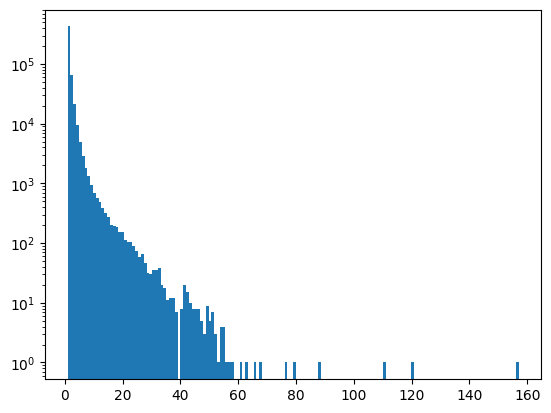

In [39]:
#Repeated questions histogram

plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()